In [8]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import os
from config import BASE_DIR

In [11]:


base_dir = os.path.abspath('')
CLUSTERS_RESULTS_PATH = f"{BASE_DIR}/results/Clusters_reconstruction"

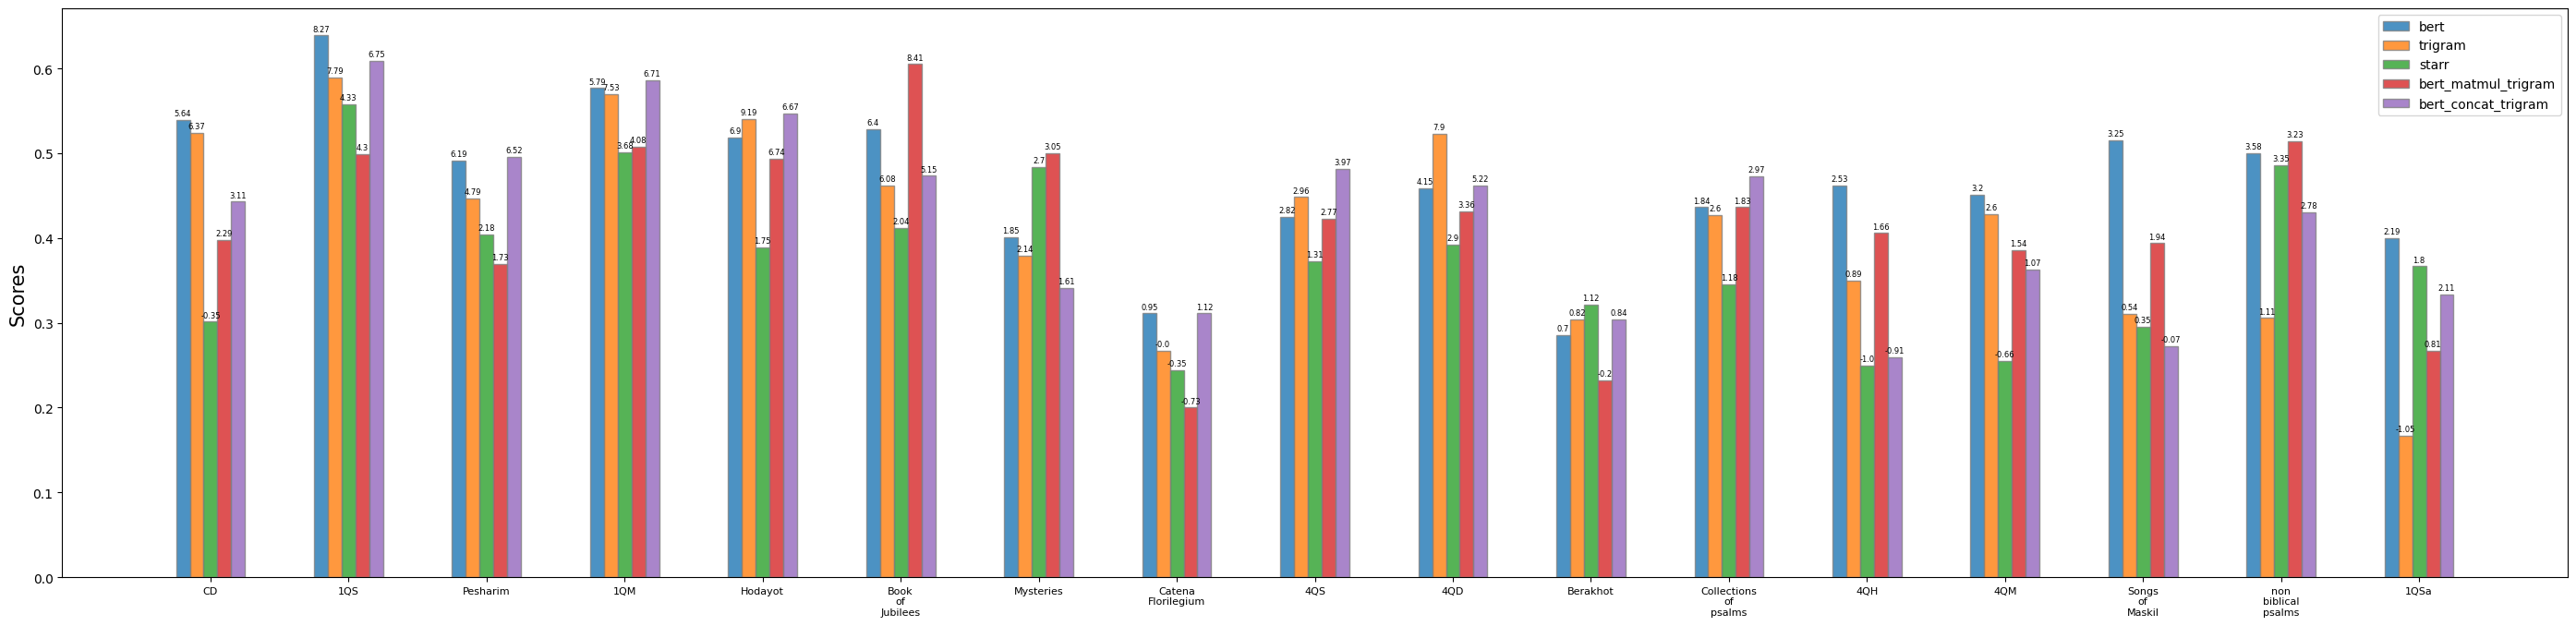

In [12]:
def get_bar_graph(feature_names):
    df = pd.read_csv(f"{CLUSTERS_RESULTS_PATH}/scores.csv")

    df = df[df["book_name"] != "Musar Lamevin"]
    scrolls_names = df["book_name"].str.replace("_", "\n").tolist()
    results = {k:[] for k in feature_names}
    significant_dict = {k:[] for k in feature_names}

    for t in feature_names:
        score_col = f"{t}_feature_clusters_score"
        random_mean_col = f"{t}_feature_random_score_mean"
        random_std_col = f"{t}_feature_random_score_std"

        scores = df[score_col].astype(float)
        random_means = df[random_mean_col].astype(float)
        random_stds = df[random_std_col].astype(float)

        significants = (scores - random_means) / random_stds

        results[t] = scores.tolist()
        significant_dict[t] = [round(val, 2) for val in significants]
    results_df = pd.DataFrame(results, index=scrolls_names)


    barWidth = 0.1
    fig, ax = plt.subplots(figsize=(35, 8))

    x_ticks = np.arange(len(scrolls_names))
    bar_dict = {}

    for i, t in enumerate(feature_names):
        x = x_ticks + i * barWidth
        bars = ax.bar(
            x, results_df[t], width=barWidth, edgecolor="grey", label=t, alpha=0.8
        )
        bar_dict[t] = bars

    # Add labels and legends
    ax.set_ylabel("Scores", fontsize=15)
    ax.set_xticks(x_ticks + (len(feature_names) - 1) * barWidth / 2)
    ax.set_xticklabels(scrolls_names, fontsize=8)
    ax.legend()

    for t in feature_names:
        for i, rect in enumerate(bar_dict[t]):
            height = rect.get_height()
            vals = significant_dict[t][i]
            ax.text(
                rect.get_x() + rect.get_width() / 2.0,
                height + 0.003,
                vals,
                ha="center",
                va="bottom",
                fontsize=6,
            )

get_bar_graph(["bert", "trigram", "starr", "bert_matmul_trigram", "bert_concat_trigram"])
